# 1. **Business Problem**

* The Client

    XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

* Project Objective:

    To generate insights to help XYZ identify the right company to make their investment.

* In next sections we will analyze data in the following process:

    * Data Intake and Preliminary Processing
    
    * Compare Yellow Cab and Pink Cab from different aspects
        * Areas to investigate:
            * Which company has maximum cab users at a particular time period?
            * Does margin proportionally increase with increase in number of customers?
            * What are the attributes of these customer segments?
            
    * Investment Recommendation
    
<font color=red>*Time period of data is from 31/01/2016 to 31/12/2018.*


In [79]:
my_str = "Seaborn iste amkoglu"

In [ ]:
with open()

---

## 2. Data Intake and Preprocessing

In [40]:
# Importing the necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')


# Import the datasets
cab_data = pd.read_csv("Cab_Data.csv")
city_data = pd.read_csv("City.csv")
customer_id_data = pd.read_csv("Customer_ID.csv")
transaction_id_data = pd.read_csv("Transaction_ID.csv")

### 2.1 Checking dtypes of all tables

#### <center><font color=blue>cab_data</center>

In [41]:
# Investigate cab_data
display(cab_data.head())
display(cab_data.info())

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


None

**- Date of Travel column should be converted to datetime object.** <br><br>
**- Time period must be consistent with the given dates.**

In [42]:
# Before changing the dtype, first investigate the origin for the date.
datetime.date(2016,1,31) - datetime.timedelta(days=min(cab_data["Date of Travel"]))

datetime.date(1900, 1, 28)

In [43]:
# As the earliest day should be 31/01/2016, the numbers are the number of days since 28/1/1900.
def date_converter(days):
    date = datetime.date(1900, 1, 28) + datetime.timedelta(days=days)
    return date
cab_data["Date of Travel"] = cab_data["Date of Travel"].apply(date_converter)
cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"])
display(min(cab_data["Date of Travel"]), max(cab_data["Date of Travel"]))    

Timestamp('2016-01-31 00:00:00')

Timestamp('2019-01-29 00:00:00')

**- As the latest day should be 31/12/2018, later days should be removed.**

In [44]:
cab_data = cab_data[cab_data["Date of Travel"] <= pd.Timestamp(2018, 12, 31)]
display(min(cab_data["Date of Travel"]), max(cab_data["Date of Travel"]))

# Let's get the year and month of the column and remove Date of Travel column
cab_data['Year'] = cab_data['Date of Travel'].dt.year
cab_data['Month'] = cab_data['Date of Travel'].dt.month
# cab_data.drop(labels="Date of Travel", axis=1, inplace=True)

Timestamp('2016-01-31 00:00:00')

Timestamp('2018-12-31 00:00:00')

In [45]:
display(cab_data.head())
display(cab_data.info())

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year,Month
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,2
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,2
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1
3,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,2
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 344953 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  344953 non-null  int64         
 1   Date of Travel  344953 non-null  datetime64[ns]
 2   Company         344953 non-null  object        
 3   City            344953 non-null  object        
 4   KM Travelled    344953 non-null  float64       
 5   Price Charged   344953 non-null  float64       
 6   Cost of Trip    344953 non-null  float64       
 7   Year            344953 non-null  int64         
 8   Month           344953 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 26.3+ MB


None

#### <center><font color=blue>city_data</center>

In [46]:
# Investigate city_data
display(city_data.head())
display(city_data.info())

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


None

**- "Population" & "Users" columns must be integers**

In [47]:
city_data.Population = (city_data.Population.apply(lambda x : x.replace(',',''))).astype("int")
city_data.Users = (city_data.Users.apply(lambda x : x.replace(',',''))).astype("int")

display(city_data.head())
display(city_data.info())

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


None

#### <center><font color=blue>customer_id_data</center>

In [48]:
# Investigate customer_id_data
display(customer_id_data.head())
display(customer_id_data.info())

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

#### <center><font color=blue>transaction_id_data</center>

In [49]:
# Investigate transaction_id_data
display(transaction_id_data.head())
display(transaction_id_data.info())

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


None

---

### 2.2 Checking for Null Values

In [50]:
# Checking whether any of the tables has missing values
display(cab_data.isna().sum(), city_data.isna().sum(), customer_id_data.isna().sum(), transaction_id_data.isna().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Year              0
Month             0
dtype: int64

City          0
Population    0
Users         0
dtype: int64

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

**- There are no missing values in the given datasets.**

---

### 2.3 Checking for Duplicate Values

In [51]:
# Print out the column names of all tables
display(cab_data.columns, city_data.columns, customer_id_data.columns, transaction_id_data.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Year', 'Month'],
      dtype='object')

Index(['City', 'Population', 'Users'], dtype='object')

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

#### <center><font color=blue>cab_data</center>

In [52]:
duplicates = cab_data.duplicated(subset="Transaction ID", keep=False)
display(cab_data[duplicates].shape[0])

0

**- There are no duplicate rows in cab_data wrt Transaction ID.** <br><br>
**- However, we need to check if there are duplicates with different Transaction IDs**

In [53]:
duplicates = cab_data.duplicated(subset=['Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Year', 'Month'], keep=False)
display(cab_data[duplicates].shape[0])

130

**- Apperantly, there are some duplicate rows in "cab_data" table. (all values are the same except Transaction ID).** <br><br>
**- However, it is possible to have the same values for other fields. We'll be sure by comparing Customer IDs of those rows with duplicate values later.** <br><br>
**- Let's continue investigating duplicates in other tables.**

#### <center><font color=blue>city_data</center>

In [54]:
duplicates = city_data.duplicated(keep=False)
display(city_data[duplicates].shape[0])

0

#### <center><font color=blue>customer_id_data</center>

In [55]:
duplicates = customer_id_data.duplicated(keep=False)
display(customer_id_data[duplicates].shape[0])

0

#### <center><font color=blue>transaction_id_data</center>

In [56]:
duplicates = transaction_id_data.duplicated(keep=False)
display(transaction_id_data[duplicates].shape[0])

0

**- There are no duplicates in any tables other than cab_data table**

#### <center><font color=blue>back to cab_data</center>

**- Let's join "cab_data" with "transaction_id_data" & "customer_id_data", in order to see if the duplicates in cab_data have the same Customer ID.**

In [57]:
cab_transaction = cab_data.merge(transaction_id_data, on="Transaction ID", how="left", validate="one_to_one")
cab_transaction_customer = cab_transaction.merge(customer_id_data, on="Customer ID", how="left", validate="many_to_one")

duplicates = cab_transaction_customer.duplicated(subset=['Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Year', 'Month', 'Customer ID'], keep=False)
cab_transaction_customer[duplicates].shape[0]

0

**- Since the transactions were made with differenct customers, we don't treat those observations in cab_data as duplicates.**

---

### 2.4 Add/Adjust fields and create master data

In [58]:
master_df = cab_transaction_customer.merge(city_data, on="City", how="left", validate="many_to_one")

# Add features for analysis
master_df["Profit"] = master_df["Price Charged"] - master_df["Cost of Trip"]
master_df["Profit_Ratio"] = master_df["Profit"] / master_df["Cost of Trip"]
master_df["Profit_per_KM"] = master_df["Profit"]/ master_df["KM Travelled"]
master_df["User_Rate"] = master_df["Users"]/ master_df["Population"]

# Assuring consistent name format for column names
for colname in master_df.columns:
    if ' ' in colname:
        master_df = master_df.rename(columns={colname:colname.replace(' ','_')})

display(master_df.info(), master_df.isna().sum(), master_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344953 entries, 0 to 344952
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      344953 non-null  int64         
 1   Date_of_Travel      344953 non-null  datetime64[ns]
 2   Company             344953 non-null  object        
 3   City                344953 non-null  object        
 4   KM_Travelled        344953 non-null  float64       
 5   Price_Charged       344953 non-null  float64       
 6   Cost_of_Trip        344953 non-null  float64       
 7   Year                344953 non-null  int64         
 8   Month               344953 non-null  int64         
 9   Customer_ID         344953 non-null  int64         
 10  Payment_Mode        344953 non-null  object        
 11  Gender              344953 non-null  object        
 12  Age                 344953 non-null  int64         
 13  Income_(USD/Month)  344953 no

None

Transaction_ID        0
Date_of_Travel        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Year                  0
Month                 0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
Population            0
Users                 0
Profit                0
Profit_Ratio          0
Profit_per_KM         0
User_Rate             0
dtype: int64

(344953, 20)

---

## 3. Compare Yellow Cab and Pink Cab from Different Aspects

---

### 3.1 Which company has maximum cab users at a particular time period?

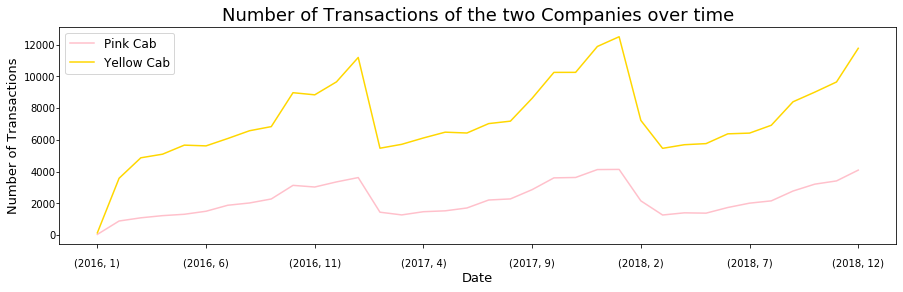

In [59]:
plt.rcParams.update({ 
    'xtick.major.pad': 10,
    'xtick.minor.pad': 10,
    'ytick.major.pad': 0.1,
    'ytick.minor.pad': 0.1,
    })

number_of_users_over_time = master_df.pivot_table(values="Transaction_ID", index=["Year","Month"], columns="Company",
                                                  aggfunc="count")
ax = number_of_users_over_time.plot(figsize=(15,4), color=["pink", "gold"])
ax.set_xlabel("Date", fontsize=13)
ax.set_ylabel("Number of Transactions", fontsize=13)
ax.set_title("Number of Transactions of the two Companies over time", fontsize=18)
ax.legend(fontsize=12)

plt.show()

**- Above line graph shows that Yellow Cab has greater number of customers for the entire time period** <br><br>
**- Seasonality is obvious for both of the companies**

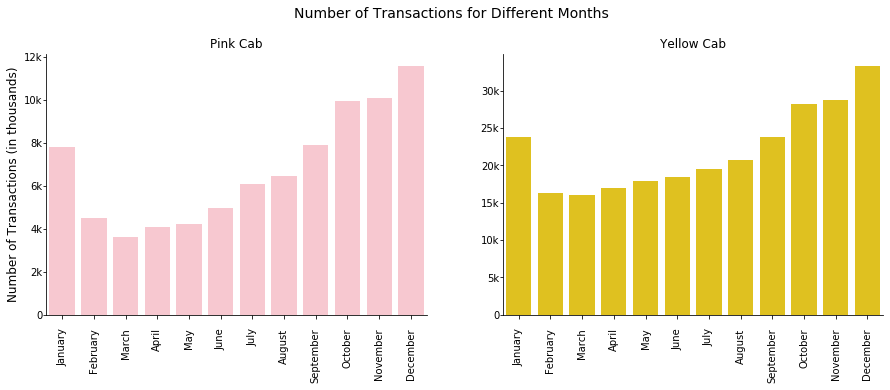

In [60]:
number_of_users_over_months = master_df.pivot_table(values="Transaction_ID", index="Month", columns="Company",
                                                   aggfunc="count")
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(data=number_of_users_over_months,
            x=number_of_users_over_months.index, y=number_of_users_over_months.values[:,0],
            color="pink", ax=axs[0])
axs[0].set_title("Pink Cab", fontsize=12)
axs[0].set_xlabel("")
axs[0].set_xticklabels(months, rotation=90)
axs[0].set_ylabel("Number of Transactions (in thousands)", fontsize=12)
axs[0].set_yticklabels(["0","2k", "4k", "6k", "8k", "10k", "12k"])
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

sns.barplot(data=number_of_users_over_months,
            x=number_of_users_over_months.index, y=number_of_users_over_months.values[:,1],
            color="gold", ax=axs[1])
axs[1].set_title("Yellow Cab")
axs[1].set_xlabel("")
axs[1].set_xticklabels(months, rotation=90)
axs[1].set_ylabel("")
axs[1].set_yticklabels(["0","5k", "10k", "15k", "20k", "25k", "30k"])
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

plt.suptitle("Number of Transactions for Different Months", fontsize=14)
plt.subplots_adjust(top=0.85)
plt.show()

**- Both companies have similar seasonal trends regarding the number of customers.**

---

### 3.2 Does margin proportionally increase with increase in number of customers?

In [61]:
transaction_over_time = master_df.pivot_table(values="Transaction_ID", index=["Year","Month"],
                                     columns="Company", aggfunc="count")
profit_over_time = master_df.pivot_table(values="Profit", index=["Year","Month"],
                                     columns="Company", aggfunc="sum")

pink_transaction = transaction_over_time.values[:,0]
yellow_transaction = transaction_over_time.values[:,1]
pink_prof = profit_over_time.values[:,0]
yellow_prof = profit_over_time.values[:,1]

my_dict = {"Pink_Cab_Users":pink_transaction, "Pink_Cab_Profit":pink_prof,
           "Yellow_Cab_Users":yellow_transaction, "Yellow_Cab_Profit":yellow_prof}

profit_users_df = pd.DataFrame(my_dict)
display(profit_users_df.head())

,Pink_Cab_Users,Pink_Cab_Profit,Yellow_Cab_Users,Yellow_Cab_Profit
0,41,4809.421,140,4.529564e+04
1,886,69143.442,3579,7.910125e+05
2,1087,90056.070,4869,1.042596e+06
3,1224,86862.262,5097,9.003045e+05
4,1310,86872.470,5667,1.037683e+06


**- We will test the hypotheses:** <br>
    *- **H00**: Profit and number of customers are proportional (i.e linearly dependent, slope is significant) for <font color=pink>Pink Cab</font>* <br>
    *- **H01**: Profit and number of customers are not proportional for <font color=pink>Pink Cab</font>* <br><br>
    *- **H10**: Profit and number of customers are proportional (i.e linearly dependent, slope is significant) for <font color=gold>Yellow Cab</font>* <br>
    *- **H11**: Profit and number of customers are not proportional for <font color=gold>Yellow Cab</font>*

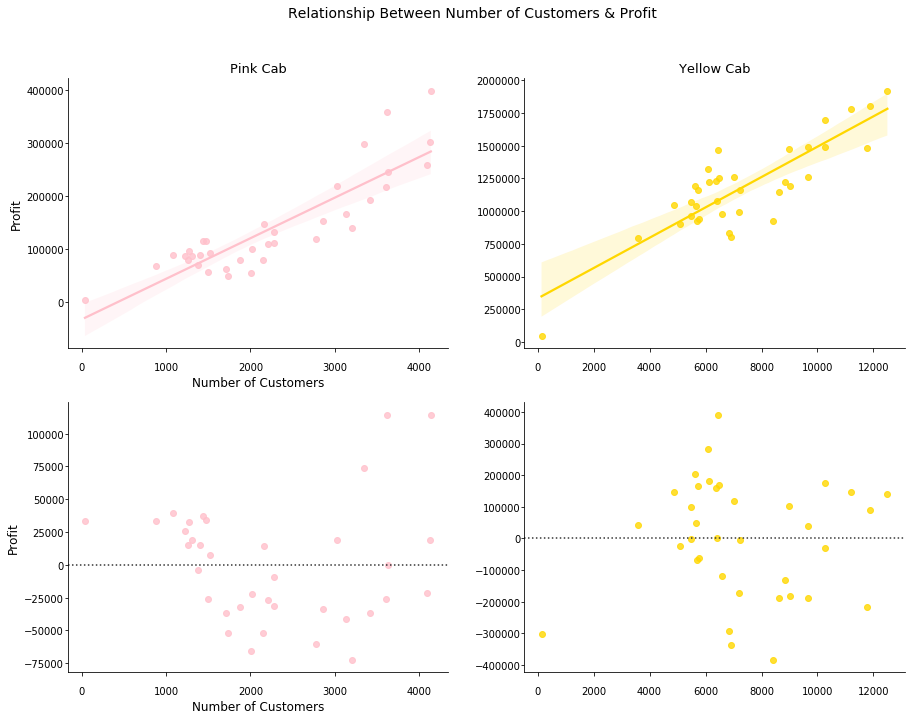

In [62]:
# Let's visually inspect the relationship for the variables

fig, axs = plt.subplots(2,2, figsize=(15,10))

sns.regplot(x="Pink_Cab_Users", y="Pink_Cab_Profit", data=profit_users_df, ax=axs[0,0], color="pink")
axs[0,0].set_ylabel("Profit", fontsize=12)
axs[0,0].set_xlabel("Number of Customers", fontsize=12)
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].set_title("Pink Cab", fontsize=13)

sns.regplot(x="Yellow_Cab_Users", y="Yellow_Cab_Profit", data=profit_users_df, ax=axs[0,1], color="gold")
axs[0,1].set_ylabel("")
axs[0,1].set_xlabel("")
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)
axs[0,1].set_title("Yellow Cab", fontsize=13)

sns.residplot(x="Pink_Cab_Users", y="Pink_Cab_Profit", data=profit_users_df, ax=axs[1,0], color="pink")
axs[1,0].set_ylabel("Profit", fontsize=12)
axs[1,0].set_xlabel("Number of Customers", fontsize=12)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)


sns.residplot(x="Yellow_Cab_Users", y="Yellow_Cab_Profit", data=profit_users_df, ax=axs[1,1], color="gold")
axs[1,1].set_ylabel("")
axs[1,1].set_xlabel("")
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)


plt.suptitle("Relationship Between Number of Customers & Profit", fontsize=14, y=1.05)
plt.subplots_adjust(top=0.95)
plt.show()

**- The increase in profit seems to be proportional to the number of customers for both companies.**

In [63]:
# We won't add a constant to the model, since there will be no profit if there is no customer.
import statsmodels.api as sm
Y = np.array(np.log(profit_users_df["Pink_Cab_Profit"]))
X = np.array(np.log(profit_users_df["Pink_Cab_Users"]))
model = sm.OLS(Y,X)
results = model.fit()
display(results.summary())

import statsmodels.api as sm
Y = np.array(np.log(profit_users_df["Yellow_Cab_Profit"]))
X = np.array(np.log(profit_users_df["Yellow_Cab_Users"]))
model = sm.OLS(Y,X)
results = model.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.335e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):                    8.57e-47
Time:                        18:32:32   Log-Likelihood:                         -32.442
No. Observations:                  36   AIC:                                      66.88
Df Residuals:                      35   BIC:                                      68.47
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5335      0.013    115.541      0.000       1.507       1.560
==============================================================================
Omnibus:                       42.867   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.551
Skew:                           2.614   Prob(JB):                     5.11e-41
Kurtosis:                      12.817   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.988e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):                    8.18e-50
Time:                        18:32:32   Log-Likelihood:                         -31.651
No. Observations:                  36   AIC:                                      65.30
Df Residuals:                      35   BIC:                                      66.89
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5780      0.011    140.997      0.000       1.555       1.601
==============================================================================
Omnibus:                       53.566   Durbin-Watson:                   0.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.162
Skew:                           3.270   Prob(JB):                     1.24e-77
Kurtosis:                      16.905   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**- For both models, the slope coefficient is statistically significant at 0.05 level.**

---

### 3.3 What are the attributes of these customer segments?

In [64]:
display(master_df.columns)

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Customer_ID',
       'Payment_Mode', 'Gender', 'Age', 'Income_(USD/Month)', 'Population',
       'Users', 'Profit', 'Profit_Ratio', 'Profit_per_KM', 'User_Rate'],
      dtype='object')

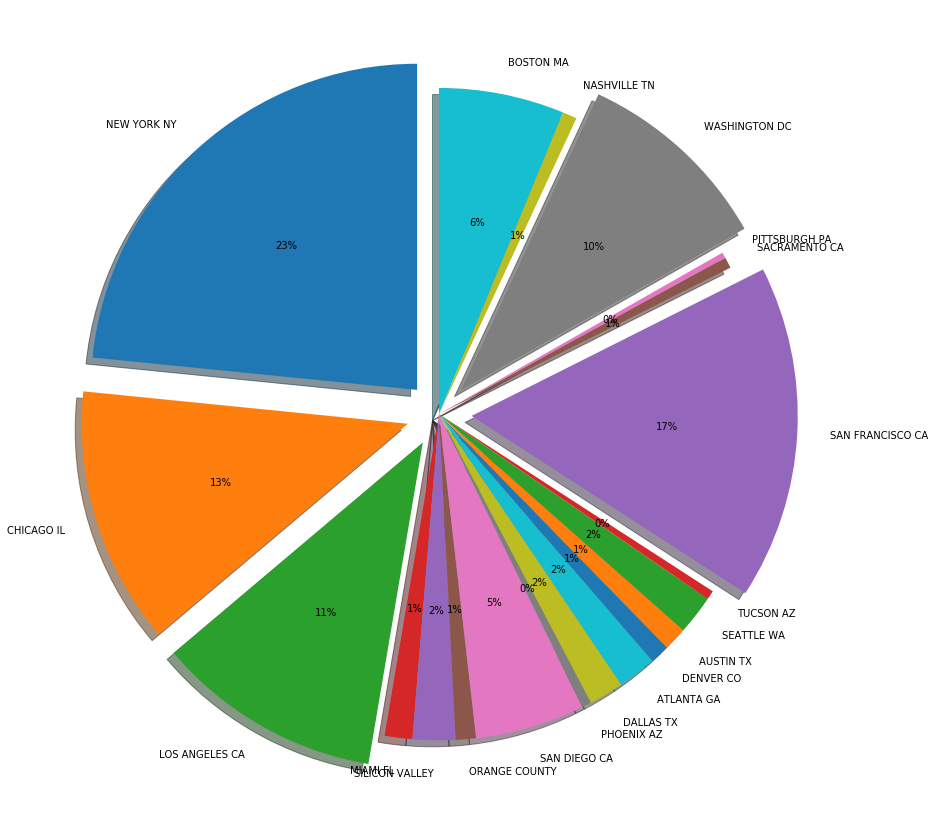

In [65]:
fig, ax = plt.subplots(figsize=(40,15))
explode = [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0.1, 0, 0]
ax.pie(city_data["Users"], labels=city_data["City"], autopct='%.0f%%', explode=explode, shadow=True, startangle=90)

plt.show()

**- Cities with most taxi users are New York, San Francisco, Chicago, Los Angeles and Washington respectively. These five cities constitues nearly 75% of the market**

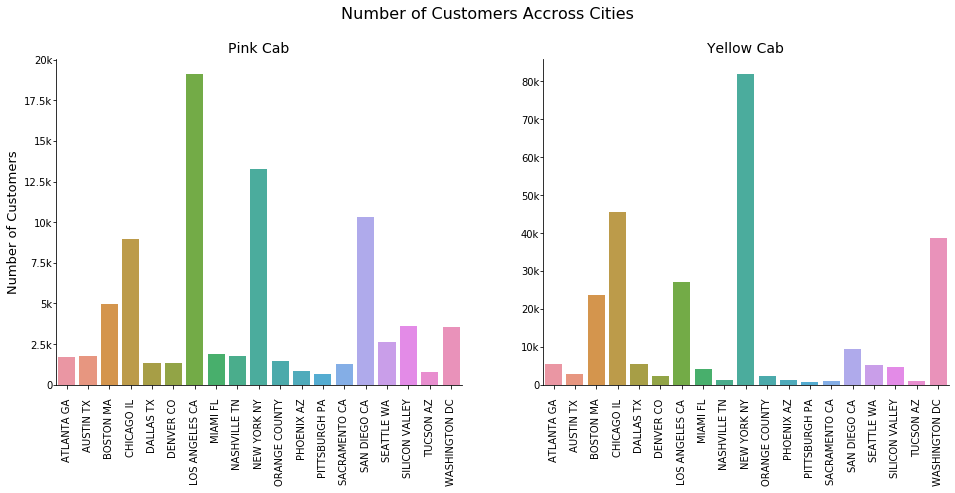

In [66]:
city_transaction = master_df.pivot_table(values="Transaction_ID", index="City", columns="Company", aggfunc="count")


fig, axs = plt.subplots(1,2, figsize=(16,6))

sns.barplot(y=city_transaction.values[:,0], x=city_transaction.index, ax=axs[0])
axs[0].set_xticklabels(city_transaction.index, rotation=90)
axs[0].set_xlabel("")
axs[0].set_yticklabels(["0","2.5k","5k","7.5k","10k","12.5k","15k","17.5k","20k"])
axs[0].set_ylabel("Number of Customers", fontsize=13)
axs[0].set_title("Pink Cab", fontsize=14)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)


sns.barplot(y=city_transaction.values[:,1], x=city_transaction.index, ax=axs[1])
axs[1].set_xticklabels(city_transaction.index, rotation=90)
axs[1].set_xlabel("")
axs[1].set_ylabel("")
axs[1].set_yticklabels(["0","10k","20k","30k","40k","50k","60k","70k","80k"])
axs[1].set_title("Yellow Cab", fontsize=14)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

plt.suptitle("Number of Customers Accross Cities", y=1, fontsize=16)

plt.show()

**- Pink Cab Company had most of its customers in Los Angeles, New York and San Diego respectively.**<br><br>
**- Yellow Cab Company had most of its customers in New York, Chicago and Washington respectively.**<br><br>
**- Interestingly, neither company has any customers in San Francisco, which has the 2nd most number of taxi users after New York.**

---Let's investigate if Age and/or Income of the customers differ across the two cab companies---

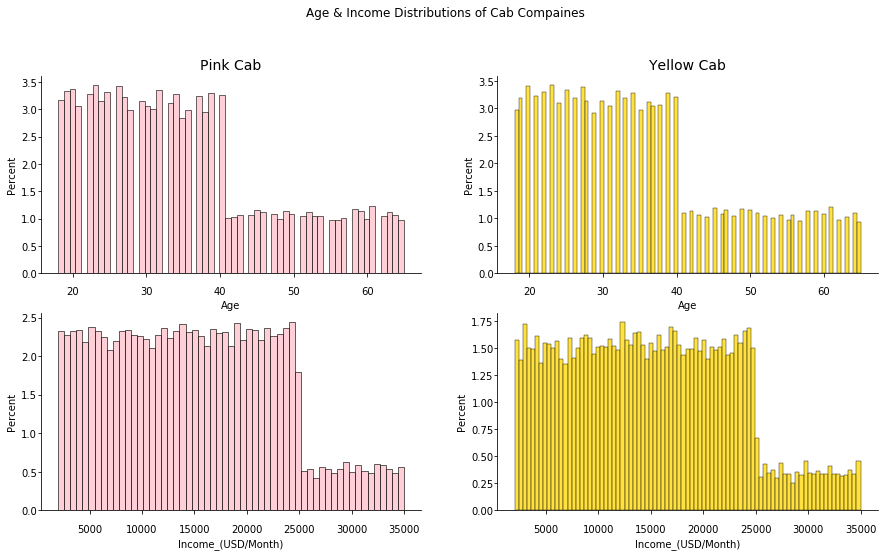

In [67]:
yellow_df = master_df.query('Company == "Yellow Cab"')
pink_df = master_df.query('Company == "Pink Cab"')

fig, axs = plt.subplots(2,2, figsize=(15,8))

sns.histplot(data=pink_df, x="Age", color="pink", ax=axs[0,0], stat="percent")
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].set_title("Pink Cab", fontsize=14)

sns.histplot(data=pink_df, x="Income_(USD/Month)", color="pink", ax=axs[1,0], stat="percent")
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)

sns.histplot(data=yellow_df, x="Age", color="gold", ax=axs[0,1], stat="percent")
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)
axs[0,1].set_title("Yellow Cab", fontsize=14)

sns.histplot(data=yellow_df, x="Income_(USD/Month)", color="gold", ax=axs[1,1], stat="percent")
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)

plt.suptitle("Age & Income Distributions of Cab Compaines", y=1)
plt.show()

**- Both compaines seem to have similar customer profiles in terms of Age & Income.**<br><br>
**- Next, we'll test this properly.**

In [68]:
# Since the Age & Income don't follow a bell-shaped distribution, we'll conduct a non-parametric test.
from scipy.stats import mannwhitneyu

# Define numpy arrays
age_pink = np.array(pink_df["Age"]).astype("float")
age_yellow = np.array(yellow_df["Age"]).astype("float")
income_pink = np.array(pink_df["Income_(USD/Month)"]).astype("float")
income_yellow = np.array(yellow_df["Income_(USD/Month)"]).astype("float")

# Test for the median age of the two groups
stat, p_value = mannwhitneyu(age_pink, age_yellow)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (Significant difference between customers' ages)")
else:
    print("Do not Reject Null Hypothesis (No significant difference between customers' ages)")
 

# Test for the median income of the two groups
stat, p_value = mannwhitneyu(income_pink, income_yellow)
print('Statistics=%.2f, p=%.2f' % (stat, p_value))
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (Significant difference between customers' median incomes)")
else:
    print("Do not Reject Null Hypothesis (No significant difference between customers' median incomes)")


Statistics=10685879750.00, p=0.17
Do not Reject Null Hypothesis (No significant difference between customers' ages)
Statistics=10697700042.50, p=0.32
Do not Reject Null Hypothesis (No significant difference between customers' median incomes)


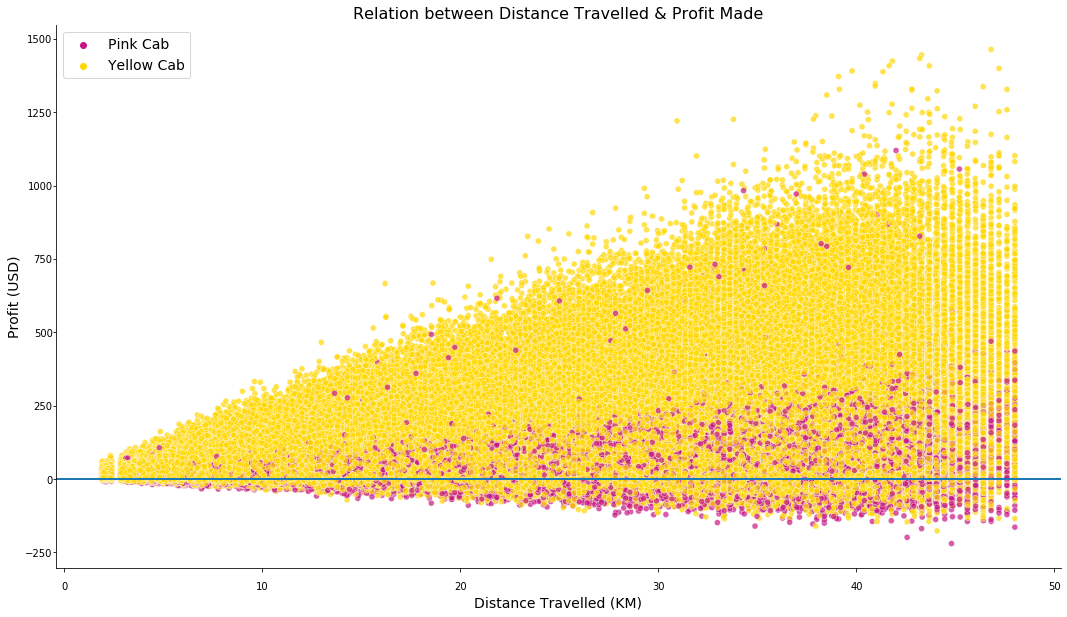

In [69]:
fig, ax = plt.subplots(figsize=(18,10))

sns.scatterplot(data=master_df, x="KM_Travelled", y="Profit", hue="Company", palette=["mediumvioletred","gold"], alpha=0.7)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Relation between Distance Travelled & Profit Made", fontsize=16)
ax.set_ylabel("Profit (USD)", fontsize=14)
ax.set_xlabel("Distance Travelled (KM)", fontsize=14)

plt.legend(fontsize=14)
plt.axhline(y=0, linewidth=2)
plt.show()

**- Interestingly, Pink Cab seems to have a bigger proportion of its transactions with negative profits. Also, Yellow Cab's margin grows more rapidly than Pink Cab's as the distance gets longer.** <br><br>

**- Next, we'll compare the Profit Rate's of the two company.**

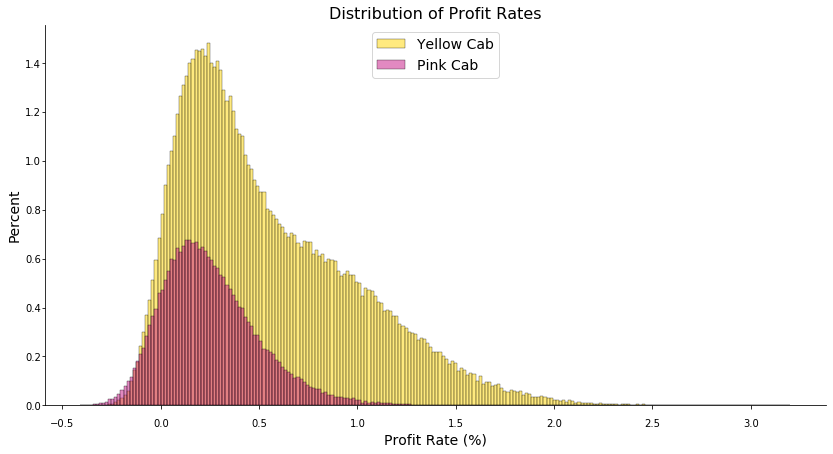

In [70]:
fig, ax = plt.subplots(figsize=(14,7))

sns.histplot(data=master_df, x="Profit_Ratio", hue="Company", stat="percent",
             palette=["mediumvioletred","gold"], ax=ax)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Distribution of Profit Rates", fontsize=16)
ax.set_xlabel("Profit Rate (%)", fontsize=14)
ax.set_ylabel("Percent", fontsize=14)


plt.legend(labels=['Yellow Cab' , 'Pink Cab'], loc="upper center", fontsize=14)
plt.show()

**- Yellow Cab's Profit Rate distribution has a bump to the right. This might have resulted in better profits for Yellow Cab.** <br><br>

In [71]:
profit_per_customer = master_df.pivot_table(values=["Profit", "Transaction_ID"], index=["Year","Month"],
                                            columns="Company", aggfunc=["sum","count"])

s = np.datetime64('2016-01')
time = [s]
for i in range(35):
    time.append(s+1)
    s = s+1
time = pd.Series(time)
    
pink_profit = pd.Series(profit_per_customer.values[:,0])
pink_users = pd.Series(profit_per_customer.values[:,6])
yellow_profit = pd.Series(profit_per_customer.values[:,1])
yellow_users = pd.Series(profit_per_customer.values[:,7])

profit_per_customer = pd.concat([time, pink_profit, pink_users, yellow_profit, yellow_users],
                                axis=1, keys=["Time","Pink_Profit","Pink_Users","Yellow_Profit","Yellow_Users"])
profit_per_customer["Profit_per_user_pink"] = profit_per_customer["Pink_Profit"] / profit_per_customer["Pink_Users"]
profit_per_customer["Profit_per_user_yellow"] = profit_per_customer["Yellow_Profit"] / profit_per_customer["Yellow_Users"]

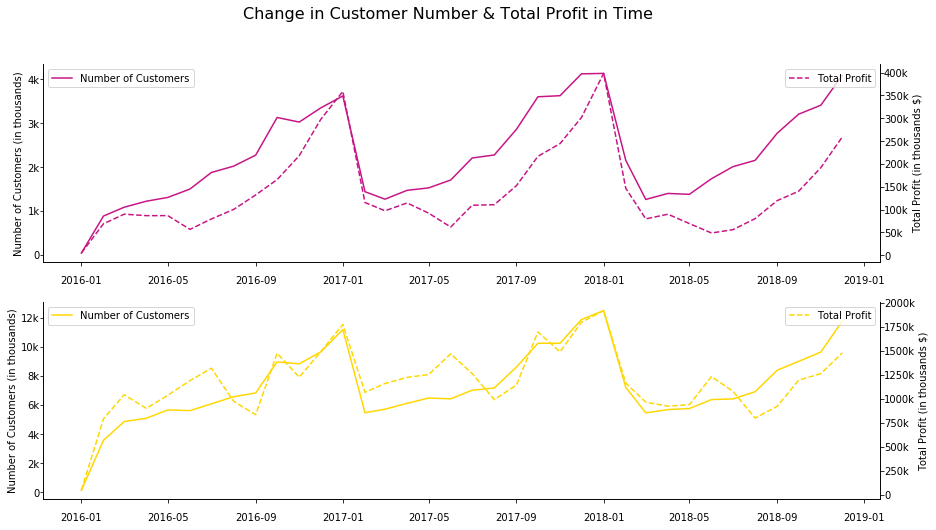

In [72]:
fig, axs = plt.subplots(2,1, figsize=(15,8))

axs[0].plot(profit_per_customer["Time"], profit_per_customer["Pink_Users"],
            color="mediumvioletred", label="Number of Customers")

axs[0].set_ylabel("Number of Customers (in thousands)")
axs[0].set_yticklabels(["0","0","1k","2k","3k","4k"])
axs[0].spines["top"].set_visible(False)
axs[0].legend(loc="upper_left")


ax01 = axs[0].twinx()
ax01.plot(profit_per_customer["Time"], profit_per_customer["Pink_Profit"],
         color="mediumvioletred", linestyle="--", label="Total Profit")

ax01.set_ylabel("Total Profit (in thousands $)")
ax01.set_yticklabels(["0","0","50k","100k","150k","200k","250k","300k","350k","400k"])
ax01.legend(loc="upper_right")
ax01.spines["top"].set_visible(False)

axs[1].plot(profit_per_customer["Time"], profit_per_customer["Yellow_Users"],
            color="gold", label="Number of Customers")

axs[1].set_ylabel("Number of Customers (in thousands)")
axs[1].set_yticklabels(["0","0","2k","4k","6k","8k","10k","12k"])
axs[1].spines["top"].set_visible(False)
axs[1].legend(loc="upper_left")


ax11 = axs[1].twinx()
ax11.plot(profit_per_customer["Time"], profit_per_customer["Yellow_Profit"],
         color="gold", linestyle="--", label="Total Profit")

ax11.set_ylabel("Total Profit (in thousands $)")
ax11.set_yticklabels(["0","0","250k","500k","750k","1000k","1250k","1500k","1750k","2000k"])
ax11.legend(loc="upper_right")
ax11.spines["top"].set_visible(False)


plt.suptitle("Change in Customer Number & Total Profit in Time", y=0.98, fontsize=16)

plt.show()

**- Above figure validates previous hypothesis about the proportionality between the number of customers & margin for both companies.**

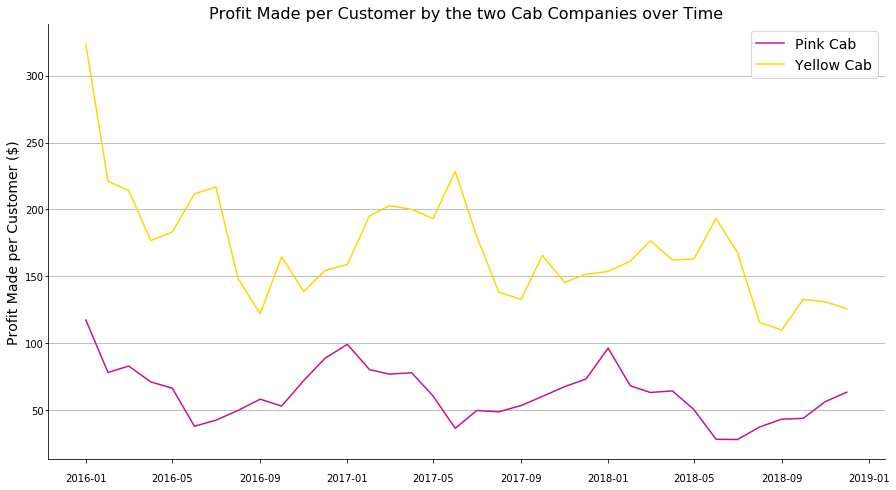

In [73]:
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(data=profit_per_customer, x="Time", y="Profit_per_user_pink", ax=ax, color="mediumvioletred", label="Pink Cab")
sns.lineplot(data=profit_per_customer, x="Time", y="Profit_per_user_yellow", ax=ax, color="gold", label="Yellow Cab")

ax.set_xlabel("")
ax.set_ylabel("Profit Made per Customer ($)", fontsize=14)
ax.set_title("Profit Made per Customer by the two Cab Companies over Time", fontsize=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.grid(axis="y")
plt.legend(fontsize=14)
plt.show()

**- While both companies' profit rates vary in time, Yellow Cab's rates are always higher than Pink Cab's.** <br><br>
**- Next, we'll take a look at the relation between these fluctiations in Profit Rates & Number of Customers.**

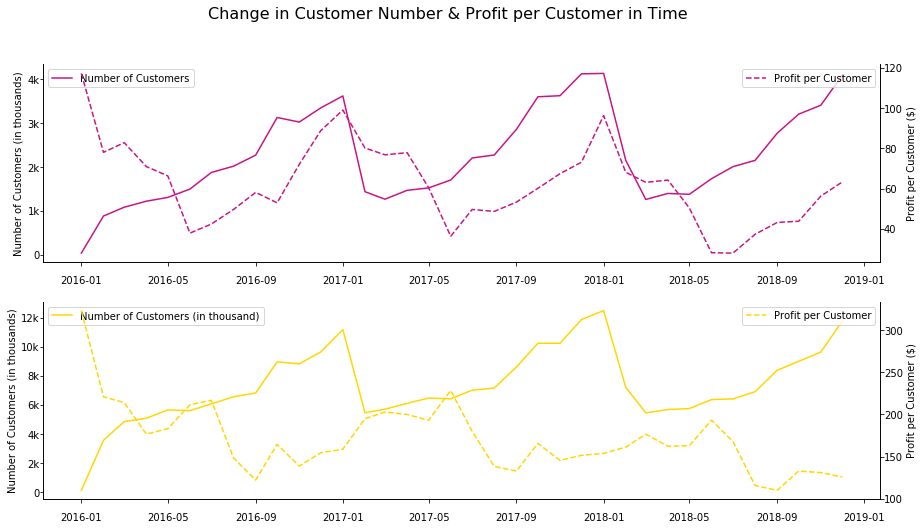

In [74]:
fig, axs = plt.subplots(2,1, figsize=(15,8))

axs[0].plot(profit_per_customer["Time"], profit_per_customer["Pink_Users"],
            color="mediumvioletred", label="Number of Customers")

axs[0].set_ylabel("Number of Customers (in thousands)")
axs[0].set_yticklabels(["0","0","1k","2k","3k","4k"])
axs[0].spines["top"].set_visible(False)
axs[0].legend(loc="upper_left")


ax01 = axs[0].twinx()
ax01.plot(profit_per_customer["Time"], profit_per_customer["Profit_per_user_pink"],
         color="mediumvioletred", linestyle="--", label="Profit per Customer")

ax01.set_ylabel("Profit per Customer ($)")
ax01.legend(loc="upper_right")
ax01.spines["top"].set_visible(False)

axs[1].plot(profit_per_customer["Time"], profit_per_customer["Yellow_Users"],
            color="gold", label="Number of Customers (in thousand)")

axs[1].set_ylabel("Number of Customers (in thousands)")
axs[1].set_yticklabels(["0","0","2k","4k","6k","8k","10k","12k"])
axs[1].spines["top"].set_visible(False)
axs[1].legend(loc="upper_left")


ax11 = axs[1].twinx()
ax11.plot(profit_per_customer["Time"], profit_per_customer["Profit_per_user_yellow"],
         color="gold", linestyle="--", label="Profit per Customer")

ax11.set_ylabel("Profit per Customer ($)")
ax11.legend(loc="upper_right")
ax11.spines["top"].set_visible(False)


plt.suptitle("Change in Customer Number & Profit per Customer in Time", y=0.98, fontsize=16)

plt.show()

**- Although not yet certain, it seems like Pink Cab Company increased their profit rates when their customer number grew. Yellow Cab Company on the other hand, seems to have decreased their profit rates in similar circumstances.**

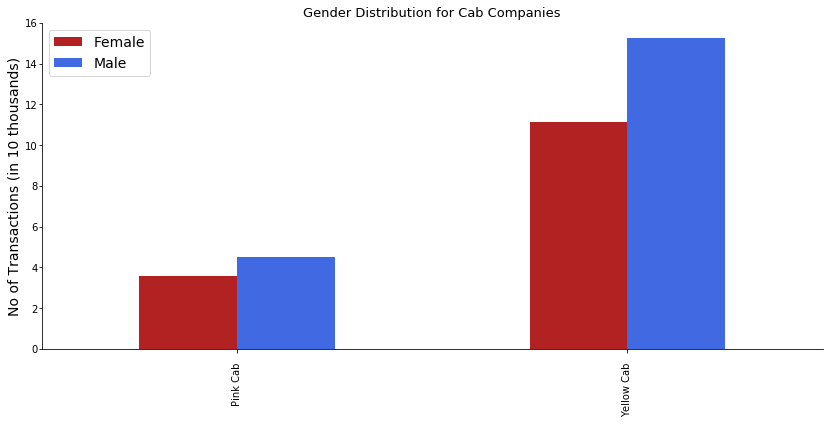

In [75]:
gender_by_company = master_df.pivot_table(values="Transaction_ID", index="Company",
                                          columns="Gender", aggfunc="count")
ax = gender_by_company.plot(kind="bar", figsize=(14,6), color=["firebrick","royalblue"])
ax.set_xlabel("")
ax.set_ylabel("No of Transactions (in 10 thousands)", fontsize=14)
ax.set_yticklabels(["0","2","4","6","8","10","12","14","16"])
ax.set_title("Gender Distribution for Cab Companies", fontsize=13)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(fontsize=14)

plt.show()

**- Gender distribution seems to differ between Yellow Cab and Pink Cab Companies. Let's conduct a proper test.**<br><br>
     - Ho: Proportions of customers of different genders are the same between the two Companies.
     - H1: Proportions of customers of different genders are not the same between the two Companies.

In [76]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(gender_by_company.values)
alpha = 0.05

print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')    

p value is 3.417178227402598e-24
Dependent (reject H0)


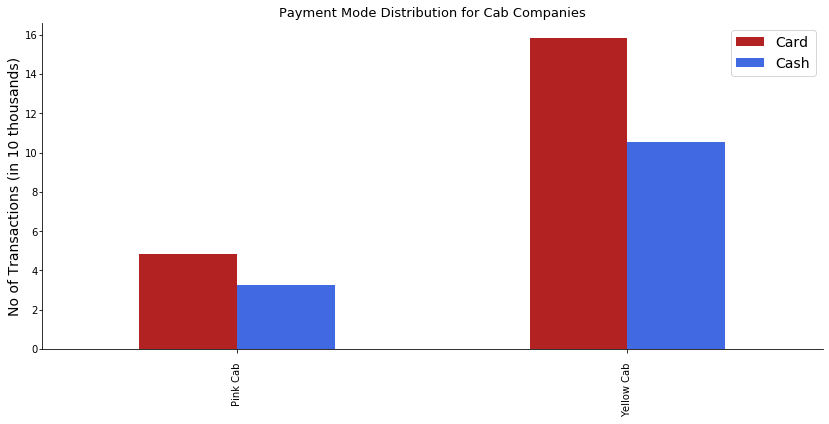

In [77]:
payment_by_company = master_df.pivot_table(values="Transaction_ID", index="Company",columns="Payment_Mode", aggfunc="count")

ax = payment_by_company.plot(kind="bar", figsize=(14,6), color=["firebrick","royalblue"])
ax.set_xlabel("")
ax.set_ylabel("No of Transactions (in 10 thousands)", fontsize=14)
ax.set_yticklabels(["0","2","4","6","8","10","12","14","16"])
ax.set_title("Payment Mode Distribution for Cab Companies", fontsize=13)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(fontsize=14)

plt.show()

**- Payment Mode distribution seems to differ between Yellow Cab and Pink Cab Companies. Let's conduct a proper test.**<br><br>
     - Ho: Proportions of customers with different payment modes are the same between the two Companies.
     - H1: Proportions of customers with different payment modes are not the same between the two Companies.

In [78]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(payment_by_company.values)
alpha = 0.05

print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')   

p value is 0.3682694786913334
Independent (H0 holds true)
